<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-cyber-data-alchemist/blob/main/kmeans_target_A01793023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<br>
<p align=center>Instituto Tecnológico y de Estudios Superiores de Monterrey</p>
<p align=center>Escuela de Ingeniería y Ciencias</p>
<p align=center>
<br>
<img src="https://github.com/PosgradoMNA/actividades-del-projecto-equipo-41/blob/main/tec.png?raw=true" alt="Logo" width="250"/>
</p>
<br>
<p align=center>Maestría en Inteligencia Artificial Aplicada (MNA)</p>
<p align=center>TC4029. Ciencia y Analítica de Datos</p>
<p align=center> Profesor Titular: María de la Paz Rico </p>
<br>
<p align=center>Presenta:</p>
<p align=center>A01793023 | Arroyo Chavelas Jorge Luis</p>
<p align=center>09 de Noviembre de 2022</p>
<br>

---

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 40.2 MB/s 
     |████████████████████████████████| 1.7 MB 12.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 51.1 MB/s 
     |████████████████████████████████| 6.3 MB 45.0 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=c74f4de79250f4363e0ca8f7aaf70abc233f5f0a5d687c783aa5ceb580c1e6da
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=77a2fa78793c3bab54ebe581e8a2ec4a236d1e4437358d028c2dea6cca0faca3
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

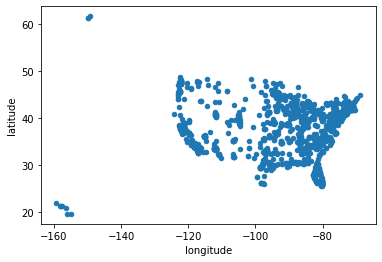

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

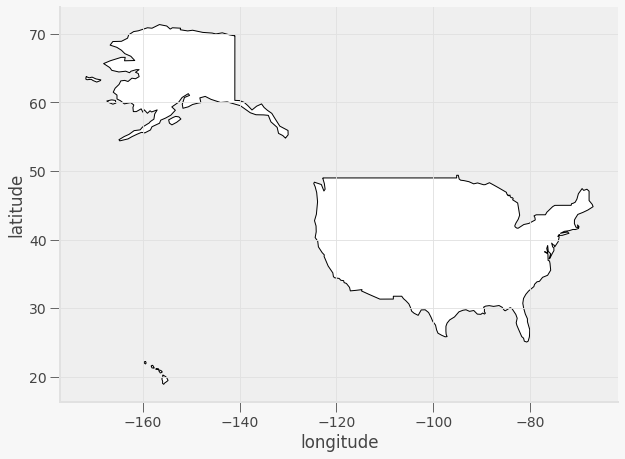

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

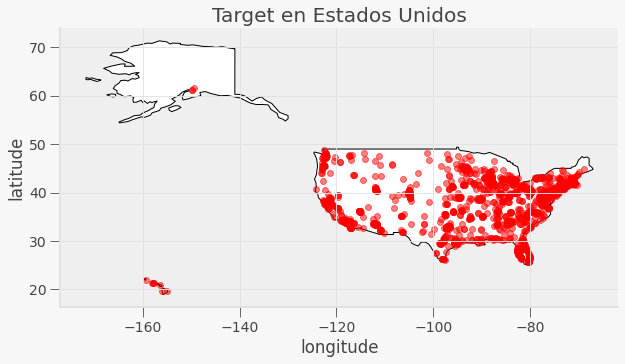

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

Encuentra el numero ideal de almacenes, justifica tu respuesta:


┌───────────────────────────────┐
│ Búsqueda de K óptimo          │
└───────────────────────────────┘



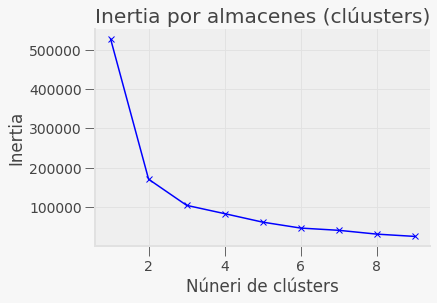

In [27]:
# Encontremos los K-Means por elbow:
from sklearn.cluster import KMeans

#Vamos a guardar el número de clusters:
inertia_list = list()

# numero de clusters a evaluar
clusters = range(1,10)
for k in clusters:
    # definamos un modelo K-means
    KM = KMeans(n_clusters=k)
    # entrenemos
    KM.fit(df[['latitude', 'longitude']])
    # Inertia: como la suma de los errores cuadrados de las obseraciones con respecto a los centroides
    inertia_list.append(KM.inertia_)


print(f"""
┌───────────────────────────────┐
│ Búsqueda de K óptimo          │
└───────────────────────────────┘
""")

plt.plot(clusters, inertia_list, 'bx-')
plt.xlabel('Núneri de clústers')
plt.ylabel('Inertia')
plt.title('Inertia por almacenes (clúusters)')
plt.show()    

> Utilizando la gráfica de arriba encontramos que 3 almacenes parecen optimos, ya que los niveles posteriores comienzan a decaer rápidamente la ganancia

Encuentra las latitudes y longitudes de los almacenes

In [34]:
# Definamos un modelo K-means de 3 clústers:
KM = KMeans(n_clusters=3)

# Entrenamos el modelo:
KM.fit(df[['latitude', 'longitude']])

# Obtenemos los datos:
print(f"""
┌───────────────────────────────┐
│ Ubicación de los clústers:    │
└───────────────────────────────┘
""")
for i, K in enumerate(KM.cluster_centers_):
  print(f"El almacen {i} deberá estar en: latitude {K[0]:.3f}, y longitud {K[1]:.3f}")


┌───────────────────────────────┐
│ Ubicación de los clústers:    │
└───────────────────────────────┘

El almacen 0 deberá estar en: latitude 37.980, y longitud -93.327
El almacen 1 deberá estar en: latitude 37.790, y longitud -78.570
El almacen 2 deberá estar en: latitude 37.487, y longitud -118.624


* ¿Qué ciudad es?

In [53]:
# from https://stackoverflow.com/questions/69409255/how-to-get-city-state-and-country-from-a-list-of-latitude-and-longitude-coordi
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

def city_state_country(coord):
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return city, state, country

ciudad = list()
state = list()
country = list()

for k in KM.cluster_centers_:
  int_ciudad, int_state, int_country = city_state_country(f"({k[0]:.5f}, {k[1]:.5f}")
  ciudad.append(int_ciudad)
  state.append(int_state)
  country.append(int_country)


almacenes_df = pd.DataFrame({
    'name': ['almacen 0', 'almacen 1', 'almacen 3'],
    'latitude': [k[0] for k in KM.cluster_centers_],
    'longitude': [k[1] for k in KM.cluster_centers_],
    'country': country,
    'state': state,
    'city': ciudad
})

,name,latitude,longitude,country,state,city
0,almacen 0,37.980063,-93.327172,United States,Missouri,
1,almacen 1,37.789554,-78.569908,United States,Virginia,
2,almacen 3,37.487342,-118.624473,United States,California,


In [54]:
# Obtenemos los datos:
print(f"""
┌───────────────────────────────┐
│ Ubicación de los clústers:    │
└───────────────────────────────┘
""")
almacenes_df.head()


┌───────────────────────────────┐
│ Ubicación de los clústers:    │
└───────────────────────────────┘



,name,latitude,longitude,country,state,city
0,almacen 0,37.980063,-93.327172,United States,Missouri,
1,almacen 1,37.789554,-78.569908,United States,Virginia,
2,almacen 3,37.487342,-118.624473,United States,California,


* ¿A cuantas tiendas va surtir?

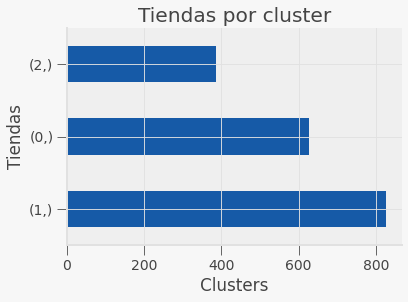

1    826
0    628
2    385
dtype: int64


In [59]:
pd.DataFrame(KM.labels_).value_counts(dropna=False).plot(kind='barh')
plt.title('Tiendas por cluster')
plt.xlabel('Clusters')
plt.ylabel('Tiendas')
plt.show()
print(f"""
┌───────────────────────────────┐
│ Tienda por  clúster:          │
└───────────────────────────────┘
""")
print(pd.DataFrame(KM.labels_).value_counts(dropna=False))

* ¿Sabes a que distancia estará?
> Si, podemos calcular con la distancia geodesica al cluster con geopy

In [69]:
# Importing the geodesic module from the library
from geopy.distance import geodesic
  
# una funcion para extraer latitudes y longitudes
def extraer_coordenada(cluster, metrica):
  return KM.cluster_centers_[cluster][metrica]


df['almacen'] = KM.labels_
df['latitude_almacen'] = df.apply(lambda x: extraer_coordenada(x['almacen'], 0), axis=1) 
df['longitude_almacen'] = df.apply(lambda x: extraer_coordenada(x['almacen'], 0), axis=1) 
df['distancia_a_almacen'] = df.apply(lambda x: geodesic((x['latitude'], x['longitude']), (x['latitude_almacen'], x['longitude_almacen'])).km, axis=1)

print(f"""
┌───────────────────────────────┐
│ Distancia a almacén:          │
└───────────────────────────────┘
""")
df
# Print the distance calculated in km
#print(geodesic(kolkata, delhi).km)


┌───────────────────────────────┐
│ Distancia a almacén:          │
└───────────────────────────────┘



,name,latitude,longitude,address,phone,website,Coordinates,almacen,latitude_almacen,longitude_almacen,distancia_a_almacen
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),0,37.980063,37.980063,10277.802025
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),0,37.980063,37.980063,10279.651954
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),0,37.980063,37.980063,10566.671518
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),0,37.980063,37.980063,10174.780829
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),1,37.789554,37.789554,10361.540027
...,...,...,...,...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429),0,37.980063,37.980063,9520.120457
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960),0,37.980063,37.980063,9528.257821
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680),2,37.487342,37.487342,10384.438223
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202),0,37.980063,37.980063,10462.205379



┌───────────────────────────────┐
│ Mapa de almacenes:            │
└───────────────────────────────┘



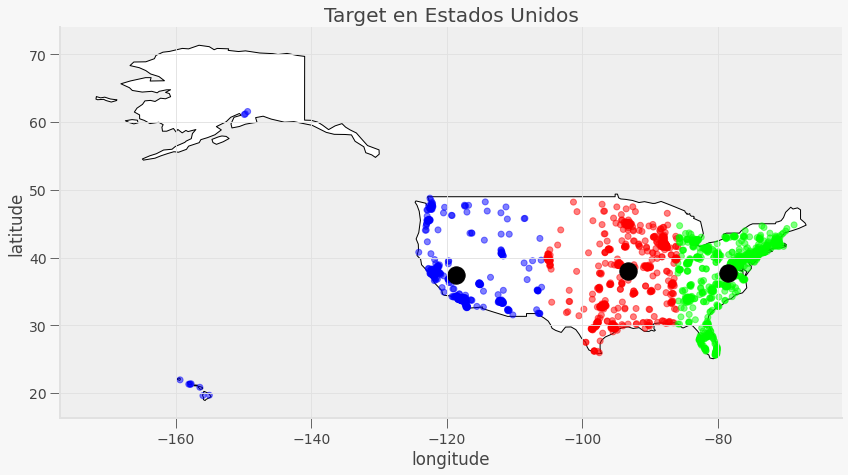

In [94]:
# https://gis.stackexchange.com/questions/336437/colorizing-polygons-based-on-color-values-in-dataframe-column
from matplotlib.colors import to_rgba

def putColor(almacen):
  return ['#ff0000', '#00ff00', '#0000ff'][almacen]

gdf['color'] = gdf.apply(lambda x: putColor(x['almacen']), axis=1)
gdf['color_rgba'] = gdf.apply(lambda row: to_rgba(row['color']), axis=1)

# Formamos un gdp.GeoDataFrame con los datos de los clusters
cluster_df = pd.DataFrame(KM.cluster_centers_)
cluster_df["Coordenadas"] = list(zip(cluster_df[1], cluster_df[0]))
cluster_df["Coordenadas"] = cluster_df["Coordenadas"].apply(Point)
gdf_clusters = gpd.GeoDataFrame(cluster_df, geometry="Coordenadas") 

#Agregamos los almacenes a gdf para hacer un hue

#Graficamos el mapa
fig, ax = plt.subplots(figsize=(14,18))
world.query("name == 'United States of America'").plot(ax = ax, edgecolor='black', color='white')
gdf.plot(ax=ax, alpha = 0.5, color=gdf['color_rgba'])

#incluimos los clusters
gdf_clusters.plot(ax=ax, color='black', alpha = 1, markersize = 300) 
# Etiquetas
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Target en Estados Unidos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
print(f"""
┌───────────────────────────────┐
│ Mapa de almacenes:            │
└───────────────────────────────┘
""")
plt.show()


* ¿Cómo elegiste el número de almacenes?

> Utilizando el método del codo al principio del ejercicio

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

* ¿Qué librerías nos pueden ayudar a graficar este tipo de datos?
  > - [GeoPandas](https://geopandas.org/en/stable/) - Crear los datasets con datos geográficos
  - [Geopy](https://geo-python.github.io/site/) - Operaciones basados en datos geográficos
  - [ArcGirs](https://developers.arcgis.com/python/) - Se usa para crear mapas y poligonos, es muy popular
* ¿Consideras importante que se grafique en un mapa?
> Bastante, pudimos ver el caso de Alaska, Hawaii y Puerto Rico en este caso que parecian outlies pero son parte de EEUU. Además se vuelve muy intuitivo.
* ¿Por qué?
> Creo que un análisis numérico de coordenadas es poco intuitivo, no creo que se pueda usar, son demasiado abstractas.

Agrega las conclusiones:
> Fue un método interesante lo de los clústers para datos geográficos, en mi trabajo tenemos retail y tenemos una configuración similar a algunos almacenes; muchos más en NY y en California por su importancia económica, pero me parece un método bastante bueno para reducir dimensiones a grupos. El mapa también me resultó bastante bueno, en mi trabajo utilizó este tipo de representaciones muy seguido para aspectos de logística; pero nucna lo había hecho en Python. Creo que esun skill muy valioso.